In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Importing dataset - the generated simulator data
data = pd.read_csv('./data/telemetries.csv', delimiter=",")
data.head()

,container_id,measurement_time,product_id,temperature,target_temperature,ambiant_temperature,kilowatts,time_door_open,content_type,defrost_cycle,oxygen_level,nitrogen_level,humidity_level,carbon_dioxide_level,vent_1,vent_2,vent_3,maintenance_required
0,C01,2019-10-21 21:58:47.778469,P02,6.421550,6,20.875069,5.104784,-0.849733,2,6,22.582955,78.414413,59.751720,2.297364,True,True,True,0
1,C01,2019-10-21 22:03:47.778469,P02,5.856868,6,21.128387,5.122725,0.617787,2,5,21.501824,78.449830,61.570283,3.782031,True,True,True,0
2,C01,2019-10-21 22:08:47.778469,P02,5.656720,6,21.171572,2.829637,2.119314,2,6,20.104576,77.771802,61.443443,5.868899,True,True,True,0
3,C01,2019-10-21 22:13:47.778469,P02,6.053072,6,20.665113,1.987387,1.103350,2,4,19.039297,75.704534,60.300971,4.518827,True,True,True,0
4,C01,2019-10-21 22:18:47.778469,P02,6.409696,6,21.025121,2.898705,0.861419,2,5,21.075411,78.685539,59.725525,4.676924,True,True,True,0


In [3]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['temperature','target_temperature','ambiant_temperature','oxygen_level','carbon_dioxide_level','humidity_level','nitrogen_level','vent_1','vent_2','vent_3','kilowatts','content_type','time_door_open','defrost_cycle']])
X[0:5]

array([[6.421549890228215, 6, 20.875069365764087, 22.58295531772213,
        2.2973638095227984, 59.751719952413076, 78.41441344522265, True,
        True, True, 5.104784197507562, 2, -0.8497332867479737, 6],
       [5.856867982999519, 6, 21.128386514434453, 21.50182356620862,
        3.7820314725518687, 61.570283077498324, 78.44983017162953, True,
        True, True, 5.122725186553819, 2, 0.6177872500681656, 5],
       [5.6567203017250645, 6, 21.17157194147064, 20.104576413467306,
        5.868899231921329, 61.443442975167926, 77.77180209085563, True,
        True, True, 2.8296373416999665, 2, 2.1193136207321763, 6],
       [6.053072053811502, 6, 20.66511333708939, 19.03929674511865,
        4.518827086315096, 60.30097139281394, 75.70453406968731, True,
        True, True, 1.9873873990101083, 2, 1.1033503981140276, 4],
       [6.409695831798644, 6, 21.025120550360636, 21.07541132606288,
        4.676923640456226, 59.725525490850856, 78.6855392897819, True,
        True, True, 2.898705

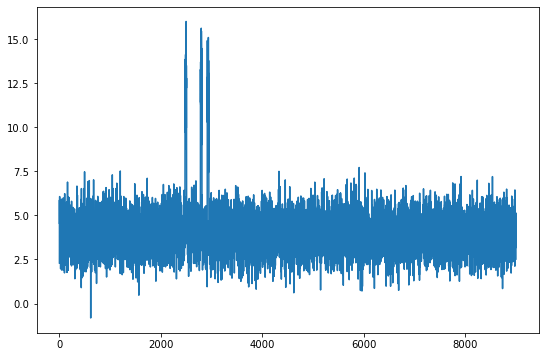

In [4]:
# Visualize the time series for co2 censor
fig,ax = plt.subplots(figsize=(9,6))
time_axe = np.arange(0,data['carbon_dioxide_level'].size,1)
ax.plot(time_axe,np.asarray(data[['carbon_dioxide_level']]))
plt.show()

In [5]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['maintenance_required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [6]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.42846617,  0.        ,  0.86228574,  1.16463912, -1.37615722,
        -0.23170658,  0.42300313,  0.09879789,  0.09879789,  0.09879789,
         2.3531473 ,  0.        , -1.84256777,  1.36547519],
       [-0.13644282,  0.        ,  1.1139979 ,  0.41603848, -0.23052444,
         1.570928  ,  0.4587289 ,  0.09879789,  0.09879789,  0.09879789,
         2.37044643,  0.        , -0.37366259,  0.47378482],
       [-0.33667099,  0.        ,  1.15690971, -0.55144779,  1.37979157,
         1.44519888, -0.22521571,  0.09879789,  0.09879789,  0.09879789,
         0.15939682,  0.        ,  1.12928051,  1.36547519],
       [ 0.05984015,  0.        ,  0.65365997, -1.28907208,  0.33801842,
         0.31273404, -2.31052291,  0.09879789,  0.09879789,  0.09879789,
        -0.65272052,  0.        ,  0.1123587 , -0.41790556],
       [ 0.41660734,  0.        ,  1.01138622,  0.12078078,  0.46001245,
        -0.25767161,  0.69649484,  0.09879789,  0.09879789,  0.09879789,
         0.22599355,  0.  

In [7]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7200, 14) (7200,)
Test set: (1800, 14) (1800,)


In [8]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
## Predict using the trained LR model
predictions = LR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
predictions_prob = LR.predict_proba(X_test)
predictions_prob

array([[0.94464566, 0.05535434],
       [0.96783915, 0.03216085],
       [0.97785729, 0.02214271],
       ...,
       [0.95307074, 0.04692926],
       [0.94147223, 0.05852777],
       [0.96540094, 0.03459906]])

In [11]:
## the accuracy metric: correct predictions / total number of records
score = LR.score(X_test,y_test)
score

0.9966666666666667

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predictions)

0.8378378378378378

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, predictions, labels=[1,0]))

Confusion matrix, without normalization
[[  31    5]
 [   1 1763]]
[[  31    5]
 [   1 1763]]


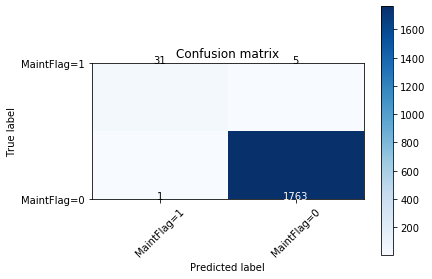

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [17]:
print (classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1764
           1       0.97      0.86      0.91        36

    accuracy                           1.00      1800
   macro avg       0.98      0.93      0.96      1800
weighted avg       1.00      1.00      1.00      1800



In [18]:

from sklearn.metrics import log_loss
log_loss(y_test, predictions_prob)


0.055594852590724095

In [19]:
import pickle

#serializing our model to a file called model_logistic_regression.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))